In [15]:
from PIL import Image
print(Image.__version__)
import os
path='F:/emergency/fire engine/'
repath='F:/gray_emergency/fire_engine/'
i=0
for file in os.listdir(path):
    i=i+1
    j=str(i)
    image=Image.open(path+file)
    image=image.convert('L')
    img_resized= image.resize((128,128))
    img_resized.save(repath+'fire_engine'+ j + ".jpg" ,'JPEG')
    i=int(j)


5.4.1


In [7]:
import os
from PIL import Image
x=['ambulance','fire_engine']
imgs_path=[]
gray_path="F:/gray_emergency/"
for i in x:
    for f in os.listdir(gray_path+i+'/'):
        img=Image.open(gray_path+i+'/'+f)
        imgs_path.append(gray_path+i+'/'+f)

In [8]:
print(imgs_path[1:6])

['F:/gray_emergency/ambulance/ambulance10.jpg', 'F:/gray_emergency/ambulance/ambulance11.jpg', 'F:/gray_emergency/ambulance/ambulance12.jpg', 'F:/gray_emergency/ambulance/ambulance13.jpg', 'F:/gray_emergency/ambulance/ambulance14.jpg']


In [56]:
import random 
random.shuffle(imgs_path)

In [57]:
print(imgs_path[1:6])

['F:/gray_emergency/ambulance/ambulance51.jpg', 'F:/gray_emergency/ambulance/ambulance8.jpg', 'F:/gray_emergency/fire_engine/fire_engine26.jpg', 'F:/gray_emergency/fire_engine/fire_engine36.jpg', 'F:/gray_emergency/ambulance/ambulance5.jpg']


In [58]:
## 1--ambulance
## 0--fire_engine
def spliting(name):
    labels=[]
    for i in name:
        if 'ambulance' in i:
            labels.append(1)
        if 'fire_engine' in i:
            labels.append(0)
    return labels
    

In [59]:
X=spliting(imgs_path)

In [60]:
print(X[1:6])

[1, 1, 0, 0, 1]


In [19]:
print(len(imgs_path))

102


In [20]:
import numpy as np
def load_image(infilename):
    img = Image.open(infilename)
    img.load()
    data = np.asarray(img,dtype="int32")
    return data/255.0

In [21]:
Y= [load_image(i) for i in imgs_path]

In [22]:
Y[0:2]

[array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]),
 array([[0.41176471, 0.59607843, 0.29411765, ..., 0.38431373, 0.42745098,
         0.85882353],
        [0.39215686, 0.60784314, 0.29019608, ..., 0.46666667, 0.4745098 ,
         0.81568627],
        [0.36862745, 0.61960784, 0.28235294, ..., 0.48235294, 0.54117647,
         0.79607843],
        ...,
        [0.7372549 , 0.72156863, 0.70980392, ..., 0.62745098, 0.63137255,
         0.63529412],
        [0.70196078, 0.68627451, 0.6745098 , ..., 0.61960784, 0.62745098,
         0.63137255],
        [0.67843137, 0.6627451 , 0.65882353, ..., 0.64313725, 0.65098039,
         0.65490196]])]

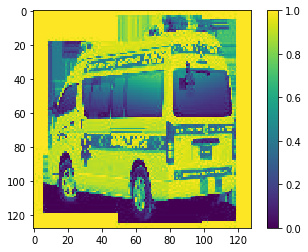

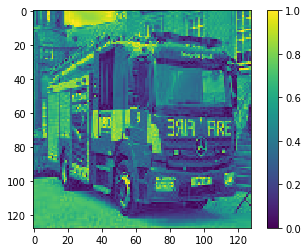

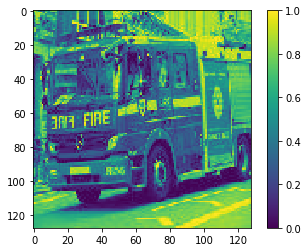

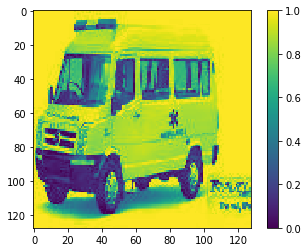

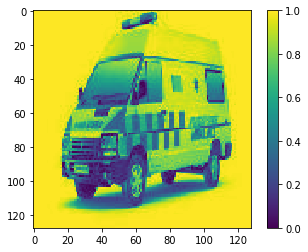

In [23]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
for i in Y[:5]:
    plt.imshow(i)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [25]:
#X-->labels
#Y-->features 
X_train=X[:80]
Y_train=Y[:80]
X_test=X[80:]
Y_test=Y[80:]

In [26]:
X_train[0]

1

In [27]:
import numpy as np
X_train=np.array(X_train)
Y_train=np.array(Y_train)
X_test=np.array(X_test)
Y_test=np.array(Y_test)

In [28]:
Y_train[0:2]

array([[[1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        ...,
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ],
        [1.        , 1.        , 1.        , ..., 1.        ,
         1.        , 1.        ]],

       [[0.41176471, 0.59607843, 0.29411765, ..., 0.38431373,
         0.42745098, 0.85882353],
        [0.39215686, 0.60784314, 0.29019608, ..., 0.46666667,
         0.4745098 , 0.81568627],
        [0.36862745, 0.61960784, 0.28235294, ..., 0.48235294,
         0.54117647, 0.79607843],
        ...,
        [0.7372549 , 0.72156863, 0.70980392, ..., 0.62745098,
         0.63137255, 0.63529412],
        [0.7

In [35]:
Y_tra= np.array(Y_train).reshape(-1,128,128,1)
Y_tes = np.array(Y_test).reshape(-1,128,128,1)

In [36]:
#pip install keras

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, GlobalAveragePooling2D, Flatten, Conv2D, BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.optimizers import Adam

In [183]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(128,128,1)),
    MaxPooling2D(2,2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(256, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(512, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(512, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [184]:
import tensorflow as tf
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [185]:
model.fit(Y_tra,X_train,epochs=30,batch_size=35,verbose=1)

Train on 80 samples
Epoch 1/30
80/80 [==============================] - 2s 23ms/sample - loss: 0.6638 - accuracy: 0.5750
Epoch 2/30
80/80 [==============================] - 1s 12ms/sample - loss: 0.9205 - accuracy: 0.6375
Epoch 3/30
80/80 [==============================] - 1s 12ms/sample - loss: 0.6773 - accuracy: 0.6500
Epoch 4/30
80/80 [==============================] - 1s 12ms/sample - loss: 0.6827 - accuracy: 0.6375
Epoch 5/30
80/80 [==============================] - 1s 12ms/sample - loss: 0.6795 - accuracy: 0.6375
Epoch 6/30
80/80 [==============================] - 1s 12ms/sample - loss: 0.6733 - accuracy: 0.6375
Epoch 7/30
80/80 [==============================] - 1s 12ms/sample - loss: 0.6536 - accuracy: 0.6375
Epoch 8/30
80/80 [==============================] - 1s 12ms/sample - loss: 0.6477 - accuracy: 0.6375
Epoch 9/30
80/80 [==============================] - 1s 12ms/sample - loss: 0.6384 - accuracy: 0.6375
Epoch 10/30
80/80 [==============================] - 1s 12ms/sample - l

In [186]:
model.evaluate(Y_tes,X_test)

22/1 [====================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 9ms/sample - loss: 0.2811 - accuracy: 0.9091


[0.28106793761253357, 0.90909094]

In [192]:
model.save('emergency_cnn.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: emergency_cnn.model\assets


In [187]:
model.predict(Y_tes)

array([[0.86204004],
       [0.9987724 ],
       [0.16575909],
       [0.37968892],
       [0.99858576],
       [0.99922717],
       [0.9987544 ],
       [0.9677928 ],
       [0.3122448 ],
       [0.08167654],
       [0.9945808 ],
       [0.7791581 ],
       [0.0933848 ],
       [0.8907028 ],
       [0.18918046],
       [0.9991768 ],
       [0.4901583 ],
       [0.9826697 ],
       [0.9935441 ],
       [0.9981324 ],
       [0.9999976 ],
       [0.3346646 ]], dtype=float32)

In [191]:
X_test[0]

0